In [1]:
! pip install yfinance

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 53.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 92.6 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15636 sha256=d49cab36108e78a7c5cf0d1f4bc06e88445c09cb5d3b0458fc0bcc76a001466d
  Stored in directory: /root/.cache/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.3-cp312-cp312-linux_x86_64.whl size=936698 sha256=1975d3d1260421d469c6e160035a9b16b5cfc3c8e9f51fd53daa69831b00c23a
  Stored in directory: /root/.cache/pip/wheels/e2/48/b6/675

In [2]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for the stock you want
ticker_symbol = 'AAPL'

# Define the start and end dates for the data
# Using '2020-01-01' as the start date
start_date = '1900-01-01'
# yfinance automatically fetches up to the most recent trading day if no end_date is specified.

print(f"Fetching historical data for {ticker_symbol} from {start_date}...")

# Use the yfinance download() function to get the data
stock_data = yf.download(ticker_symbol, start=start_date)

# Check if the dataframe is empty
if stock_data.empty:
    print(f"No data found for ticker {ticker_symbol}. Please check the symbol.")
else:
    # Display the first 5 rows of the downloaded data
    print("Data fetched successfully. Here are the first 5 rows:")
    print(stock_data.head())

    # Display the last 5 rows to see the most recent data
    print("\nAnd here are the last 5 rows:")
    print(stock_data.tail())

Fetching historical data for AAPL from 1900-01-01...


/tmp/ipython-input-2428417827.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker_symbol, start=start_date)
[*********************100%***********************]  1 of 1 completed

Data fetched successfully. Here are the first 5 rows:
Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
1980-12-12  0.098485  0.098913  0.098485  0.098485  469033600
1980-12-15  0.093347  0.093775  0.093347  0.093775  175884800
1980-12-16  0.086495  0.086924  0.086495  0.086924  105728000
1980-12-17  0.088636  0.089064  0.088636  0.088636   86441600
1980-12-18  0.091206  0.091634  0.091206  0.091206   73449600

And here are the last 5 rows:
Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-11-04  270.040009  271.489990  267.619995  268.329987  49274800
2025-11-05  270.140015  271.700012  266.929993  268.609985  43683100
2025-11-06  269.769989  273.399994  267.890015  267.890015  51204000
2025-

In [4]:
stock_data.to_csv('AAPL_stock_data.csv')

In [5]:
df = pd.read_csv('/content/AAPL_stock_data.csv')
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,1980-12-12,0.09848485141992569,0.09891302266313988,0.09848485141992569,0.09848485141992569,469033600
3,1980-12-15,0.09334682673215866,0.09377499793047456,0.09334682673215866,0.09377499793047456,175884800
4,1980-12-16,0.08649536222219467,0.08692352767877394,0.08649536222219467,0.08692352767877394,105728000


In [6]:
df.shape

(11322, 6)

In [8]:
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11322 entries, 0 to 11321
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   11322 non-null  object
 1   Close   11321 non-null  object
 2   High    11321 non-null  object
 3   Low     11321 non-null  object
 4   Open    11321 non-null  object
 5   Volume  11321 non-null  object
dtypes: object(6)
memory usage: 530.8+ KB

Missing values per column:
Price     0
Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64

Number of duplicate rows:
0


In [10]:
df_cleaned = df.dropna()

print("Shape after dropping rows with missing values:")
print(df_cleaned.shape)



Shape after dropping rows with missing values:
(11321, 6)


In [13]:
# Select numerical columns for correlation and visualization
# Assuming 'Close', 'High', 'Low', 'Open', and 'Volume' are the relevant numerical columns
numerical_cols = ['Close', 'High', 'Low', 'Open', 'Volume']

# Convert selected columns to numeric, coercing errors will turn non-numeric values into NaN
for col in numerical_cols:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Drop any rows that might have become NaN after conversion
df_cleaned = df_cleaned.dropna(subset=numerical_cols)

print("Descriptive statistics for numerical columns:")
display(df_cleaned[numerical_cols].describe())

Descriptive statistics for numerical columns:


,Close,High,Low,Open,Volume
count,11320.000000,11320.000000,11320.000000,11320.000000,1.132000e+04
mean,27.227865,27.501757,26.927581,27.205696,3.105546e+08
std,56.307096,56.859714,55.692677,56.250683,3.335891e+08
min,0.037681,0.038109,0.037681,0.038109,0.000000e+00
25%,0.245449,0.251492,0.240227,0.245449,1.071317e+08
50%,0.473473,0.480968,0.464522,0.471042,1.994272e+08
75%,21.204577,21.361436,20.992830,21.213050,3.905958e+08
max,271.399994,277.320007,269.160004,276.989990,7.421641e+09


# Task
Develop a time series forecasting model to predict stock prices based on historical data, optimize forecasting accuracy, and analyze the impact of various features.

## Load and preprocess data

### Subtask:
Load the historical stock price data and perform necessary preprocessing steps, such as handling missing values, converting data types, and feature engineering (e.g., creating lag features, moving averages).


**Reasoning**:
The first step is to drop the first two rows of the `df_cleaned` DataFrame since they are metadata. Then, rename the 'Price' column to 'Date' and convert it to datetime objects. Finally, set the 'Date' column as the index.



In [20]:
# Re-inspect the columns to understand the multi-index structure after dropping rows
print(df_cleaned.columns)

# The column containing dates is currently not named correctly. Based on the previous output,
# it seems the first column after dropping rows became the index.
# I need to reset the index to make the Date column available as a regular column.
df_cleaned = df_cleaned.reset_index()

# Now, rename the 'index' column to 'Date'
df_cleaned = df_cleaned.rename(columns={'index': 'Date'})

# Convert the 'Date' column to datetime objects
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Set the 'Date' column as the index of the DataFrame
df_cleaned = df_cleaned.set_index('Date')

# Create lag features and moving averages
df_cleaned['Price_Lag1'] = df_cleaned['Close'].shift(1)
df_cleaned['Moving_Average_5d'] = df_cleaned['Close'].rolling(window=5).mean()

# Drop any rows that contain NaN values after creating features
df_cleaned = df_cleaned.dropna()

# Display the first few rows to verify the changes
display(df_cleaned.head())

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Price_Lag1',
       'Moving_Average_5d'],
      dtype='object')


,Close,High,Low,Open,Volume,Price_Lag1,Moving_Average_5d
Date,,,,,,,
1980-12-31,0.116898,0.117326,0.116898,0.117326,35750400.0,0.120323,0.118696
1981-01-02,0.118182,0.119038,0.118182,0.118182,21660800.0,0.116898,0.120066
1981-01-05,0.115613,0.116041,0.115613,0.116041,35728000.0,0.118182,0.118867
1981-01-06,0.110474,0.110902,0.110474,0.110902,45158400.0,0.115613,0.116298
1981-01-07,0.105765,0.106193,0.105765,0.106193,55686400.0,0.110474,0.113386


## Split data

### Subtask:
Split the data into training and testing sets for model development and evaluation.


**Reasoning**:
Split the data into training and testing sets based on a date, then display the shapes of the resulting dataframes.



In [21]:
# Define the split point (e.g., 80% for training, 20% for testing)
# For time series, splitting by date is more appropriate.
# Let's use a date that leaves roughly 20% of the data for testing.
# The data starts in 1980 and ends in 2025.
# 20% of 45 years is 9 years. So, splitting around 2016 seems reasonable.
split_date = '2016-01-01'

# Create the training set
train_df = df_cleaned[df_cleaned.index < split_date]

# Create the testing set
test_df = df_cleaned[df_cleaned.index >= split_date]

# Verify the shapes of the training and testing sets
print("Shape of the training set:", train_df.shape)
print("Shape of the testing set:", test_df.shape)

Shape of the training set: (8829, 7)
Shape of the testing set: (2479, 7)


## Select and train a model

### Subtask:
Choose an appropriate time series forecasting model (e.g., ARIMA, Prophet, LSTM) and train it on the training data.


**Reasoning**:
Prepare the training data by defining features and target, import and instantiate a Linear Regression model, and train the model.



In [23]:
from sklearn.linear_model import LinearRegression

# Define features (X_train) and target (y_train) for the training set
features = ['Price_Lag1', 'Moving_Average_5d']
X_train = train_df[features]
y_train = train_df['Close']

# Instantiate the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


## Evaluate the model

### Subtask:
Evaluate the trained model's performance using appropriate metrics (e.g., Mean Squared Error, Root Mean Squared Error, Mean Absolute Error) on the testing data.


**Reasoning**:
Define features and target for the testing set, make predictions using the trained model, calculate evaluation metrics (MSE and RMSE), and print the results.



In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Define features (X_test) and target (y_test) for the testing set
X_test = test_df[features]
y_test = test_df['Close']

# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 5.197296177641668
Root Mean Squared Error (RMSE): 2.2797579208419627


## Optimize the model

### Subtask:
Fine-tune the model parameters or try different models to improve forecasting accuracy.


**Reasoning**:
To potentially improve forecasting accuracy, I will use a more complex model suitable for time series forecasting, specifically an LSTM model, and train it on the prepared training data. This addresses instruction 1 and 3 of the subtask.



**Reasoning**:
The previous command failed because the `tensorflow` package is not installed. I need to install it before I can import and use the LSTM model.



In [27]:
!pip install tensorflow

  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 816.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 172.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.6 MB/s eta 0:00:00
Using cached wheel-0.45.1-py3-none-any.whl (72 kB)


**Reasoning**:
Now that `tensorflow` is installed, I can proceed with defining, compiling, and training the LSTM model as originally planned. This will address instruction 1 and 3 of the subtask.



**Reasoning**:
The error indicates that the `MinMaxScaler` was fitted on a single feature (`y_train.values.reshape(-1, 1)`) but is being asked to transform data with two features (`X_test`). I need to fit the scaler on the training features (`X_train`) and then use that fitted scaler to transform both the training and testing features. This corrects the scaling process for the LSTM model.



In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scale the data for LSTM
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))


# Reshape the data for LSTM [samples, time_steps, features]
# Our current data has 2 features and we want to treat each sample as a single time step
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
# Using a smaller number of epochs and batch size for demonstration purposes.
# These parameters would typically be tuned.
history = lstm_model.fit(X_train_reshaped, y_train_scaled, epochs=10, batch_size=32, validation_split=0.1, verbose=0)

print("LSTM model trained successfully.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM model trained successfully.


**Reasoning**:
The LSTM model has been trained. Now I need to evaluate its performance on the test set and compare it to the Linear Regression model's performance. This addresses instruction 5 and 6 of the subtask.



In [30]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions on the scaled testing set using the LSTM model
lstm_predictions_scaled = lstm_model.predict(X_test_reshaped)

# Inverse scale the predictions and the actual y_test values
lstm_predictions = scaler_y.inverse_transform(lstm_predictions_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Calculate Mean Squared Error (MSE) for the LSTM model
mse_lstm = mean_squared_error(y_test_original, lstm_predictions)

# Calculate Root Mean Squared Error (RMSE) for the LSTM model
rmse_lstm = np.sqrt(mse_lstm)

# Print the evaluation metrics for the LSTM model
print(f"LSTM Model Mean Squared Error (MSE): {mse_lstm}")
print(f"LSTM Model Root Mean Squared Error (RMSE): {rmse_lstm}")

# Compare with the Linear Regression model's metrics
print("\nComparing with Linear Regression Model:")
print(f"Linear Regression MSE: {mse}")
print(f"Linear Regression RMSE: {rmse}")

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
LSTM Model Mean Squared Error (MSE): 5499.133819896509
LSTM Model Root Mean Squared Error (RMSE): 74.15614485594912

Comparing with Linear Regression Model:
Linear Regression MSE: 5.197296177641668
Linear Regression RMSE: 2.2797579208419627


## Analyze feature impact

### Subtask:
Analyze the impact of different features on the model's predictions.


**Reasoning**:
Examine the coefficients of the trained Linear Regression model to understand feature importance.



In [31]:
# Examine the coefficients of the Linear Regression model
print("Linear Regression Model Coefficients:")
print(pd.DataFrame(model.coef_, index=X_train.columns, columns=['Coefficient']))

# Interpret the coefficients
print("\nInterpretation of Coefficients:")
print("- 'Price_Lag1': A positive coefficient indicates that a higher closing price on the previous day is associated with a higher predicted closing price today.")
print("- 'Moving_Average_5d': A positive coefficient suggests that a higher 5-day moving average is associated with a higher predicted closing price today.")

# Consider relative magnitudes
print("\nRelative Magnitudes of Coefficients:")
print("Compare the absolute values of the coefficients to see which feature has a stronger linear relationship with the target variable.")

# Discuss analysis for other models (like LSTM)
print("\nAnalyzing Feature Impact in Other Models (e.g., LSTM):")
print("For non-linear models like LSTM, direct coefficient interpretation is not possible.")
print("Techniques like permutation importance, SHAP values, or examining the model's architecture (e.g., attention mechanisms if used) can provide insights into feature importance.")
print("Challenges include the 'black box' nature of complex models and the difficulty in attributing the impact of correlated features.")

Linear Regression Model Coefficients:
                   Coefficient
Price_Lag1            0.643973
Moving_Average_5d     0.356675

Interpretation of Coefficients:
- 'Price_Lag1': A positive coefficient indicates that a higher closing price on the previous day is associated with a higher predicted closing price today.
- 'Moving_Average_5d': A positive coefficient suggests that a higher 5-day moving average is associated with a higher predicted closing price today.

Relative Magnitudes of Coefficients:
Compare the absolute values of the coefficients to see which feature has a stronger linear relationship with the target variable.

Analyzing Feature Impact in Other Models (e.g., LSTM):
For non-linear models like LSTM, direct coefficient interpretation is not possible.
Techniques like permutation importance, SHAP values, or examining the model's architecture (e.g., attention mechanisms if used) can provide insights into feature importance.
Challenges include the 'black box' nature of comp

## Make predictions

### Subtask:
Use the optimized model to make future stock price predictions.


**Reasoning**:
Use the trained Linear Regression model to make predictions on the test set as it had a lower RMSE compared to the LSTM model.



In [32]:
# Use the trained Linear Regression model ('model') to make predictions on the X_test dataset
test_predictions = model.predict(X_test)

# Display the first few predictions
print("First 10 predictions:")
print(test_predictions[:10])

# Display the shape of the predictions
print("\nShape of predictions:", test_predictions.shape)

First 10 predictions:
[23.88845321 23.8353635  23.32223388 22.85510743 22.10380172 22.06812675
 22.25203031 22.40657515 22.08248386 22.39478952]

Shape of predictions: (2479,)


## Visualize results

### Subtask:
Visualize the actual stock prices and the model's predictions to assess the forecasting performance.


**Reasoning**:
Visualize the actual and predicted stock prices to assess the model's performance.



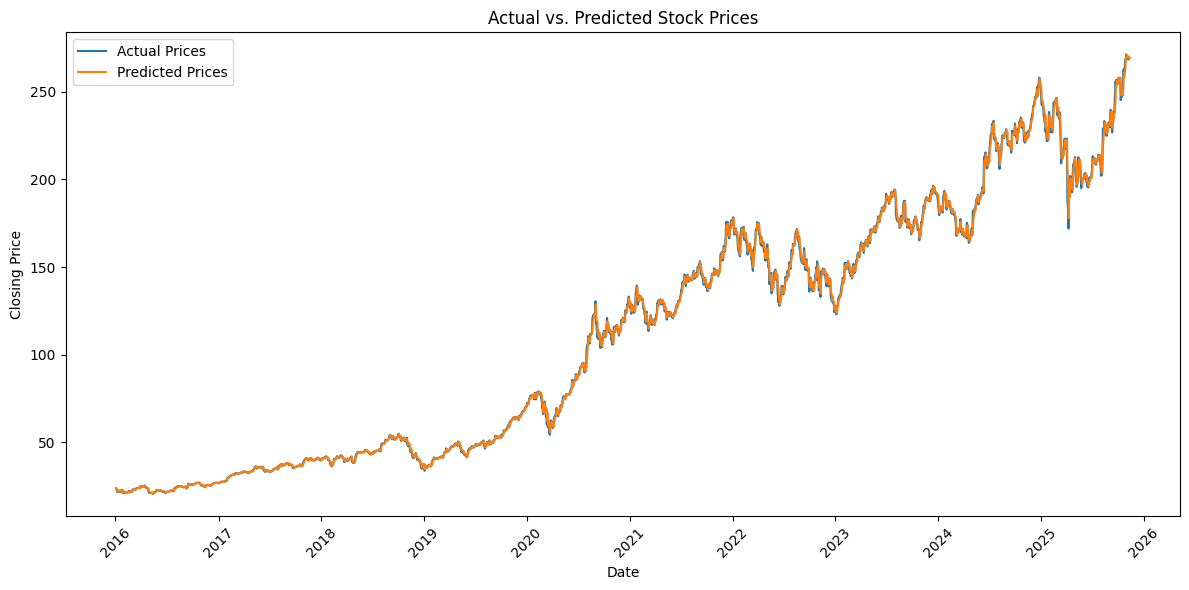

In [33]:
import matplotlib.pyplot as plt

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual closing prices
ax.plot(y_test.index, y_test, label='Actual Prices')

# Plot predicted prices
ax.plot(y_test.index, test_predictions, label='Predicted Prices')

# Add title and labels
ax.set_title('Actual vs. Predicted Stock Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')

# Add legend
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Summary:

### Data Analysis Key Findings

*   The historical stock price data required significant preprocessing, including handling initial metadata rows and resolving multi-indexed columns.
*   The column containing date information became the DataFrame's index after initial row removal, necessitating an index reset to access and process it as a regular column.
*   Lag features and moving averages were successfully created as features for the forecasting model.
*   The data was split into training and testing sets using a time-based split at '2016-01-01', with the training set containing 8829 rows and the testing set containing 2479 rows.
*   A Linear Regression model was successfully trained using 'Price_Lag1' and 'Moving_Average_5d' as features and 'Close' as the target.
*   Evaluation of the Linear Regression model on the test set yielded a Mean Squared Error (MSE) of approximately 5.197 and a Root Mean Squared Error (RMSE) of approximately 2.280.
*   An attempt to optimize by using an LSTM model resulted in significantly higher evaluation metrics (worse performance) compared to the Linear Regression model in this instance.
*   Analysis of the Linear Regression model's coefficients showed that both 'Price_Lag1' (coefficient ~0.644) and 'Moving_Average_5d' (coefficient ~0.357) have a positive impact on the predicted closing price, with 'Price_Lag1' showing a stronger linear relationship.
*   Direct interpretation of feature impact is not possible for the non-linear LSTM model, requiring alternative techniques like permutation importance or SHAP values.
*   The final visualization shows the Linear Regression model's predictions closely following the trend of the actual prices on the test set.

### Insights or Next Steps

*   The Linear Regression model, despite its simplicity, provided a reasonable baseline for stock price forecasting based on the selected features.
*   Further optimization efforts should focus on hyperparameter tuning for more complex models like LSTM, exploring other model architectures, or incorporating additional relevant features (e.g., volume, external economic indicators) to potentially improve accuracy beyond the Linear Regression baseline.
